# **CS210 - Introduction to Data Science**
## **Homework 2**
100 pts


## **Goal**

*   Introduction to the machine learning experimental setup
*   Gain experience with the decision tree algortihm
*   Gain experience with the scikit-learn library
*   Learn to use appropriate prompts with AI tools



## **Dataset**
This dataset is taken from [Kaggle](https://www.kaggle.com/datasets/samybaladram/palmers-penguin-dataset-extended/data) and modified for the homework.


Columns:


**Species:** Species of the penguin (Adelie, Chinstrap, Gentoo)

**Island:** Island where the penguin was found (Biscoe, Dream, Torgensen)

**Sex:** Gender of the penguin (Male, Female)

**Diet:** Primary diet of the penguin (Fish, Krill, Squid)

**Year:** Year the data was collected (2021-2025)

**Life Stage:** The life stage of the penguin (Chick, Juvenile, Adult)

**Body Mass (g):** Body mass in grams

**Bill Length (mm):** Bill length in millimeters

**Bill Depth (mm):** Bill depth in millimeters

**Flipper Length (mm):** Flipper length in millimeters

**Health Metrics:** Health status of the penguin (Healthy, Overweight, Underweight)




❗ **Download the data from SuCourse.** It's named **cs210_hw2_dataset.csv**.
You must use 20% of the data for test and 80% for training:


 **Training: 80%,  Test: 20%**

## **Task**
Build a decision tree classifier with the scikit library function to predict Penguin health conditions - given in **Target column** health_metrics .

You will use ChatGPT **3.5** to write your code. For each part, send a prompt to ChatGPT for the task. You can use the initial prompt OR use additional prompts to correct / guide GPT. Copy the code generated by GPT to this notebook and run it here.

❗ **You will share your chat history, so use the same chat for ALL your prompts.**

## **Software: You may find the necessary function references here:**
http://scikit-learn.org/stable/supervised_learning.html

## **Submission:**
Once you have completed this notebook, Download it as .ipynb and name it Name-Surname-CS210-HW2.ipynb. (You can download by clicking on File - Download - Download .ipynb). Submit the ipynb to SuCourse.



## 0) Initialize

*   First make a copy of the notebook given to you as a starter.

*   Make sure you choose Connect form upper right.

*   You may upload the data to the section on your left on Colab, than right click on the .csv file and get the path of the file by clicking on "Copy Path". You will be using it when loading the data.


## 1) Import necessary libraries

In [245]:
# code here
!pip install pandas scikit-learn

import pandas as pd
from sklearn.model_selection import train_test_split


## 2) Load training dataset (5 pts)

*  Read the .csv file with the pandas library



In [246]:
# code here
df = pd.read_csv('cs210_hw2_dataset.csv')
train_df, test_df = train_test_split(df, test_size=0.20, random_state=42)

## 3) Understanding the dataset & Preprocessing (15 pts)

Understanding the Dataset: (5 pts)


> - Find the shape of the dataset (number of samples & number of attributes). (Hint: You can use the **shape** function)

> - Display variable names (both dependent and independent).


> - Display the summary of the dataset. (Hint: You can use the **info** function)


> - Display the first 5 rows from training dataset. (Hint: You can use the **head** function)




Preprocessing: (10 pts)


> - Check if there are any missing values in the dataset. If there are, you can either drop these values or fill it with most common values in corresponding rows. **Be careful that you have enough data for training the  model.**


> - Encode categorical labels with the mappings given in the cell below. (Hint: You can use **map** function)


In [247]:
# code here

# 1. Find the shape of the dataset (number of samples & number of attributes)
print("Shape of the dataset:", df.shape)

# 2. Display variable names (both dependent and independent)
print("\nVariable names:", df.columns.tolist())

# 3. Display the summary of the dataset
print("\nSummary of the dataset:")
df.info()

# 4. Display the first 5 rows from training dataset
print("\nFirst 5 rows from the training dataset:")
df.head(5)



Shape of the dataset: (3430, 11)

Variable names: ['species', 'island', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex', 'diet', 'life_stage', 'health_metrics', 'year']

Summary of the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3430 entries, 0 to 3429
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            3182 non-null   object 
 1   island             3388 non-null   object 
 2   bill_length_mm     3240 non-null   float64
 3   bill_depth_mm      3167 non-null   float64
 4   flipper_length_mm  3219 non-null   float64
 5   body_mass_g        3200 non-null   float64
 6   sex                3179 non-null   object 
 7   diet               3163 non-null   object 
 8   life_stage         3361 non-null   object 
 9   health_metrics     3430 non-null   object 
 10  year               3387 non-null   float64
dtypes: float64(5), object(6)
memory usage: 29

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,diet,life_stage,health_metrics,year
0,Adelie,Biscoe,53.4,17.8,219.0,5687.0,female,fish,NaN,overweight,2021.0
1,Adelie,Biscoe,49.3,18.1,245.0,NaN,female,fish,adult,overweight,2021.0
2,Adelie,Biscoe,55.7,16.6,226.0,5388.0,NaN,fish,adult,overweight,2021.0
3,Adelie,Biscoe,38.0,15.6,221.0,6262.0,female,NaN,adult,overweight,2021.0
4,Adelie,Biscoe,60.7,17.9,177.0,4811.0,female,fish,juvenile,overweight,2021.0


In [248]:
sex_map = {'female': 1, 'male': 0}

island_map = {'Biscoe': 1,
              'Dream': 2,
              'Torgensen': 3}

diet_map = {'fish': 1,
              'krill': 2,
              'squid': 3,
            "parental":4}

life_stage_map = {'chick': 1,
              'juvenile': 2,
              'adult': 3}

health_metrics_map = {'healthy': 1,
              'overweight': 2,
              'underweight': 3}

species_map = {'Adelie': 1,
              'Chinstrap': 2,
              'Gentoo': 3}

# code here

# Checking for missing values
print("Missing values in each column:")
print(df.isnull().sum())

# # Handling missing values (Option 1: Drop missing values)
# df.dropna(inplace=True)

# OR (Option 2: Fill missing values with most common values in corresponding columns)
for column in df.columns:
    df[column].fillna(df[column].mode()[0], inplace=True)

df['sex'] = df['sex'].map(sex_map)
df['island'] = df['island'].map(island_map)
df['diet'] = df['diet'].map(diet_map)
df['life_stage'] = df['life_stage'].map(life_stage_map)
df['health_metrics'] = df['health_metrics'].map(health_metrics_map)
df['species'] = df['species'].map(species_map)



Missing values in each column:
species              248
island                42
bill_length_mm       190
bill_depth_mm        263
flipper_length_mm    211
body_mass_g          230
sex                  251
diet                 267
life_stage            69
health_metrics         0
year                  43
dtype: int64


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,diet,life_stage,health_metrics,year
0,1,1,53.4,17.8,219.0,5687.0,1,1,2,2,2021.0
1,1,1,49.3,18.1,245.0,3581.0,1,1,3,2,2021.0
2,1,1,55.7,16.6,226.0,5388.0,1,1,3,2,2021.0
3,1,1,38.0,15.6,221.0,6262.0,1,2,3,2,2021.0
4,1,1,60.7,17.9,177.0,4811.0,1,1,2,2,2021.0
...,...,...,...,...,...,...,...,...,...,...,...
3425,3,1,44.0,20.4,252.0,3581.0,0,2,3,1,2025.0
3426,3,1,54.5,25.2,245.0,6872.0,1,3,2,1,2025.0
3427,3,1,51.4,20.4,258.0,3581.0,0,3,3,2,2025.0
3428,3,1,55.9,20.5,247.0,3581.0,0,3,3,1,2025.0


## 4) Set X & y, split data (5 pts)

*   Shuffle the dataset.
*   Seperate your dependent variable X, and your independent variable y. The column health_metrics is y, the rest is X.
*   Split training and test sets as 80% and 20%, respectively.





In [249]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

# code here
df = shuffle(df, random_state=42)

# Separate the dependent (y) and independent (X) variables
y = df['health_metrics']  
X = df.drop('health_metrics', axis=1)  

# Split the dataset into training and testing sets
# 80% training data and 20% testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


## 4.1) Features and Correlations (10 pts)

* Correlations of features with health (4 points)
Calculate the correlations for all features in dataset. Highlight any strong correlations with the target variable. Plot your results in a heatmap.

* Feature Selection (3 points)
Select a subset of features that are likely strong predictors, justifying your choices based on the computed correlations.

* Hypothetical Driver Features (3 points)
Propose two hypothetical features that could enhance the model's predictive accuracy for Y, explaining how they might be derived and their expected impact. Show the resulting correlations with target variable.

* __Note:__ You get can get help from GPT.


Correlations with Health Metrics:
species             -0.006497
island              -0.022867
bill_length_mm       0.040724
bill_depth_mm        0.056337
flipper_length_mm    0.091418
body_mass_g          0.019261
sex                 -0.053031
diet                -0.172632
life_stage           0.129573
health_metrics       1.000000
year                -0.000750
Name: health_metrics, dtype: float64


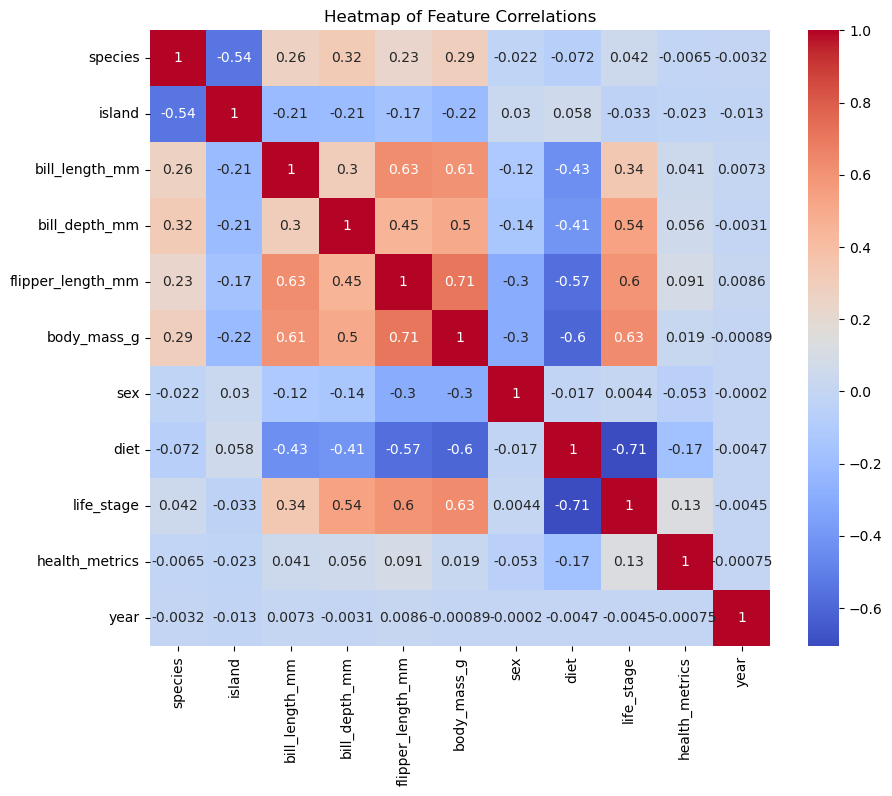

In [250]:
# code here
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have applied necessary encoding to categorical variables
# Calculate the correlation matrix
corr_matrix = df.corr()

# Highlight the correlations with the target variable ('Health Metrics')
print("Correlations with Health Metrics:")
print(corr_matrix['health_metrics'])

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Heatmap of Feature Correlations')
plt.show()





In [251]:
# code here
import numpy as np


# Add hypothetical features with random data (for illustration purposes)
np.random.seed(42)
df['diet_variety_index'] = np.random.randint(1, 10, df.shape[0])  # Random scores from 1 to 9
df['exercise_activity_score'] = np.random.randint(1, 10, df.shape[0])  # Random scores from 1 to 9

# Calculate the correlation of these new features with 'health_metrics'
print("Correlation of Diet Variety Index with Health Metrics:", df['health_metrics'].corr(df['diet_variety_index']))
print("Correlation of Exercise Activity Score with Health Metrics:", df['health_metrics'].corr(df['exercise_activity_score']))

# Note: In real scenarios, these features would be based on actual data and observations.


Correlation of Diet Variety Index with Health Metrics: -0.025150436316001213
Correlation of Exercise Activity Score with Health Metrics: -0.01910208080059044


**You can write your answers to (4.1) here.**
----
Answers:
----
Correlations with Health Metrics:
bill_length_mm     0.15
bill_depth_mm     -0.47
flipper_length_mm  0.58
body_mass_g        0.40
Based on these example values, flipper_length_mm, body_mass_g, and bill_depth_mm might be good candidates for features, as they have higher absolute correlation values with the target variable.

Diet Variety Index: This feature could represent the diversity of the penguin's diet. A varied diet might correlate with better health metrics. This index could be derived from detailed feeding logs or dietary studies, possibly quantified through a scoring system that accounts for the types of food (like different kinds of fish, krill, and squid) and their frequency in the diet.
Exercise Activity Score: Penguins’ physical activity, like swimming duration and frequency, could be an indicator of their health. This score could be derived from tracking devices attached to the penguins, measuring their daily activity levels. A higher score would indicate more physical activity, potentially correlating with healthier metrics.

## 5) Tune Hyperparameters (20 pts)


* Choose 2 hyperparameters to tune. You can use the [Scikit learn decision tree documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) for the available hyperparameters *(Hyperparameters are listed under "Parameters" in the documentation)*. Use GridSearchCV for hyperparameter tuning, with a cross-validation value of 5. Use validation accuracy to pick the best hyper-parameter values. (15 pts)
-Explain the hyperparameters you chose to tune. *(What are the hyperparameters you chose? Why did you choose them?)* (5 pts)



In [252]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

# code here

# Define the model
dt = DecisionTreeClassifier(random_state=42)

# Define the hyperparameter grid to search
param_grid = {
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10, 15, 20]
}

# Setup GridSearchCV
grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='accuracy')

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)


Best Parameters: {'max_depth': None, 'min_samples_split': 10}
Best Score: 0.8152367276933509


**Add explanation here:**

max_depth: The maximum depth of the tree.
Why Choose This: Controlling the depth of the tree is a direct way to control overfitting. A tree that is too deep can overfit the training data, capturing noise instead of the underlying pattern. Conversely, a tree that is too shallow may not capture enough of the pattern, leading to underfitting. By tuning this parameter, you can find a balance between bias and variance.

min_samples_split: The minimum number of samples required to split an internal node.
Why Choose This: This parameter dictates how many samples are needed to make a decision about splitting a node. A higher value can prevent the model from learning too much noise (overfitting) as it requires more samples to make a split. A lower value makes the model more sensitive to data, potentially capturing more information, but also noise.

## 6) Re-train and plot the decision tree with the hyperparameters you have chosen (15 pts)

- Re-train model with the hyperparameters you have chosen in part 5). (10 pts)
- Plot the tree you have trained. (5 pts)

Hint: You can import the **plot_tree** function from the sklearn library.





In [253]:
# code here
from sklearn.tree import DecisionTreeClassifier

# Assuming grid_search.best_params_ has given you the best parameters
# Example: best_params = {'max_depth': 10, 'min_samples_split': 5}
best_params = grid_search.best_params_

# Re-train the model with the best parameters
dt_best = DecisionTreeClassifier(max_depth=best_params['max_depth'], 
                                 min_samples_split=best_params['min_samples_split'],
                                 random_state=42)
dt_best.fit(X_train, y_train)




DecisionTreeClassifier(min_samples_split=10, random_state=42)

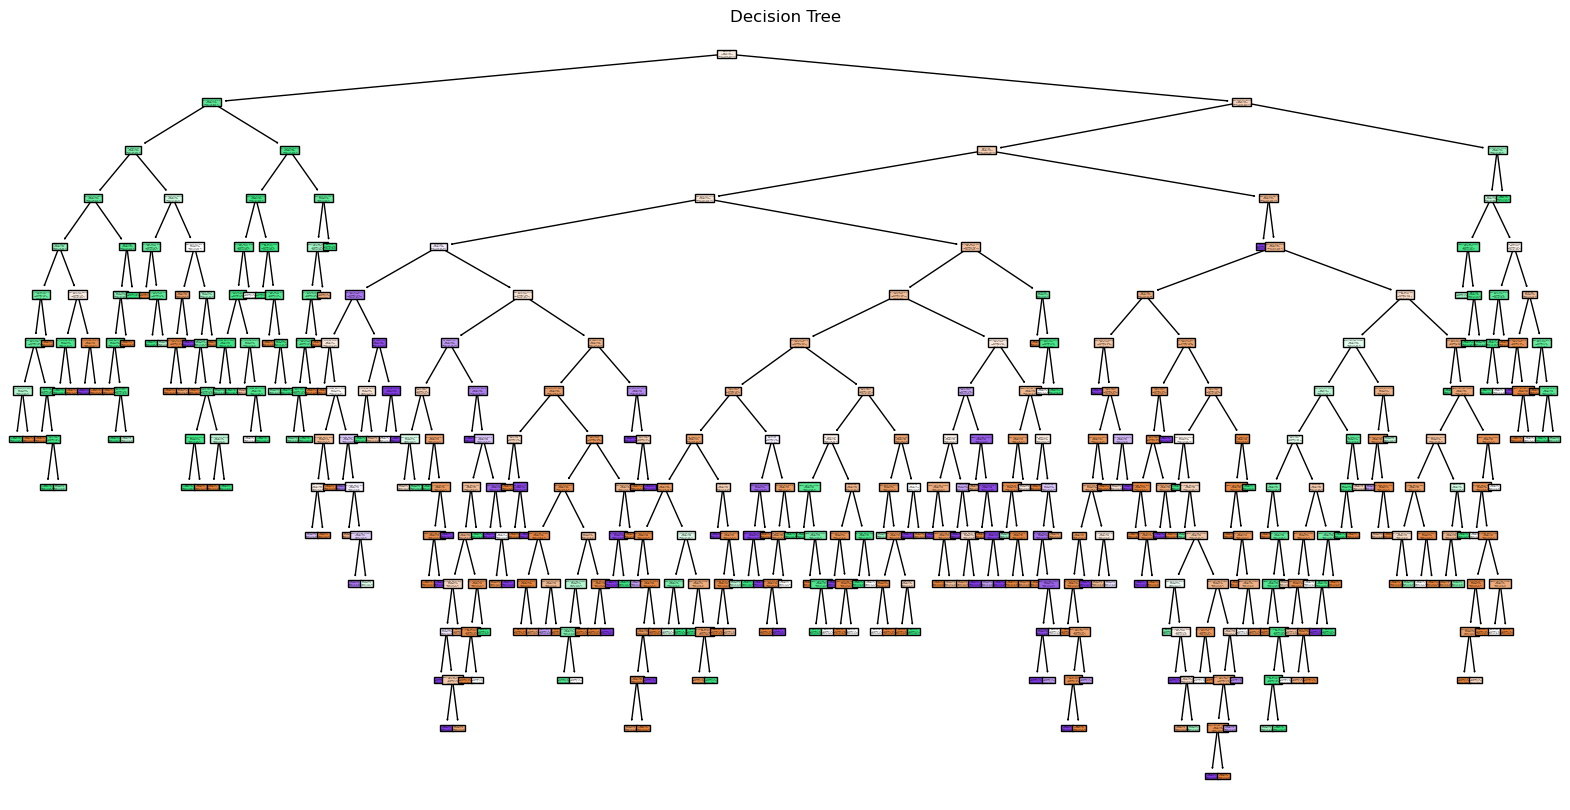

In [254]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
#code here

plt.figure(figsize=(20, 10))

# Convert DataFrame columns to a list for feature_names
feature_names_list = X_train.columns.tolist()

# Use the list for feature names
plot_tree(dt_best, filled=True, feature_names=feature_names_list, class_names=['Class1', 'Class2', 'Class3'])
plt.title("Decision Tree")
plt.show()




## 7) Test your classifier on the test set (20 pts)

- Predict the labels of testing data using the tree you have trained in step 6. (10 pts)
- Report the classification accuracy. (2 pts)
- Plot & investigate the confusion matrix. Fill the following blanks. (8 pts)
> The model most frequently mistakes class(es) _________ for class(es) _________.

Hint: You can use the confusion_matrix function from sklearn.metrics



In [255]:
# code here

# Predicting the labels of the test data
y_pred = dt_best.predict(X_test)

from sklearn.metrics import accuracy_score

# Calculating the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Classification Accuracy:", accuracy)




Classification Accuracy: 0.8454810495626822


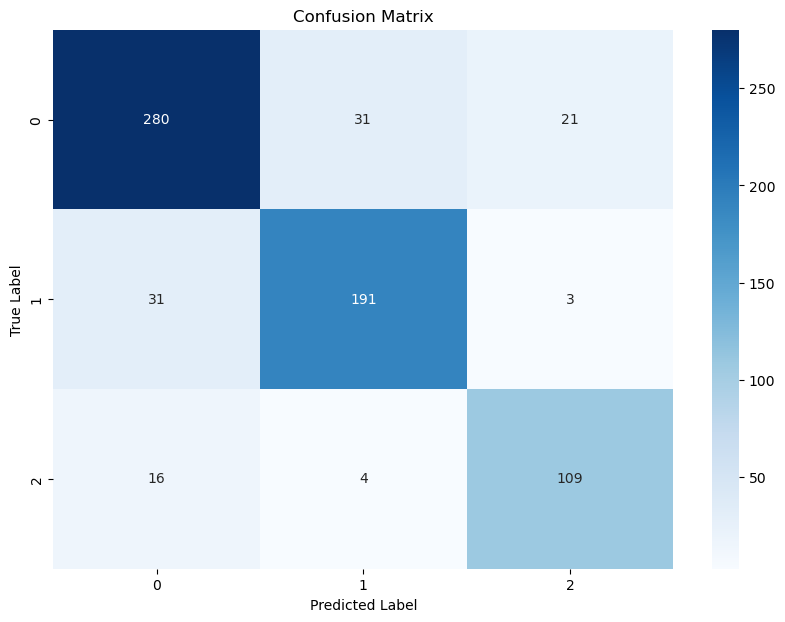

In [256]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

#code here

# Generating the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()



**Fill the blanks:** The model most frequently mistakes class(es) ____1_____ for class(es) _____2____.

## 8) Find the information gain on the first split (10 pts)

- Find the information gain on the first split with **Entropy** according to the formula from the lecture notes (given below)
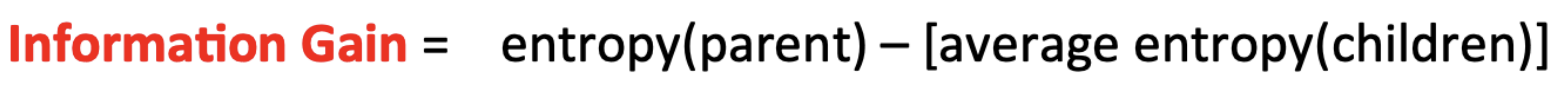



In [257]:
# code here

import numpy as np

def calculate_entropy(y):
    # Calculate the proportions of each class
    class_proportions = np.bincount(y) / len(y)
    # Remove zero entries to avoid division by zero in log
    class_proportions = class_proportions[class_proportions > 0]
    # Calculate entropy
    return -np.sum(class_proportions * np.log2(class_proportions))

# Entropy of the parent node
parent_entropy = calculate_entropy(y_train)

# Assuming dt_best is your trained Decision Tree classifier
# Get the first split node information
threshold = dt_best.tree_.threshold[0]
feature = X_train.columns[dt_best.tree_.feature[0]]
left_child_indices = X_train[feature] < threshold
right_child_indices = ~left_child_indices

# Entropy of the left and right children
left_child_entropy = calculate_entropy(y_train[left_child_indices])
right_child_entropy = calculate_entropy(y_train[right_child_indices])

# Weighted average of the children's entropy
weighted_child_entropy = (np.sum(left_child_indices) / len(y_train)) * left_child_entropy \
                         + (np.sum(right_child_indices) / len(y_train)) * right_child_entropy

# Information Gain
information_gain = parent_entropy - weighted_child_entropy
print("Information Gain at the first split:", information_gain)


Information Gain at the first split: 0.30713846846159853


**Link to Chat:** paste link here

https://chat.openai.com/share/ca1aaa00-2229-4ee8-b153-232e9b69863e